Assignment 5 Malika Uteuliyeva

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import random as rn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#create a function f(x,y)
def f(x,y):
    return 2*x*y+2*x-x**2-2*y**2

One of the objectives of the Assignment 5 is to perform a random search of the maximum value of the function. The function is a polynomial, that means there are no constraints on x,y values as it is continuous on its domain. It is more convenient to firstly visually analyze a graph of the function, to narrow the area of search. 

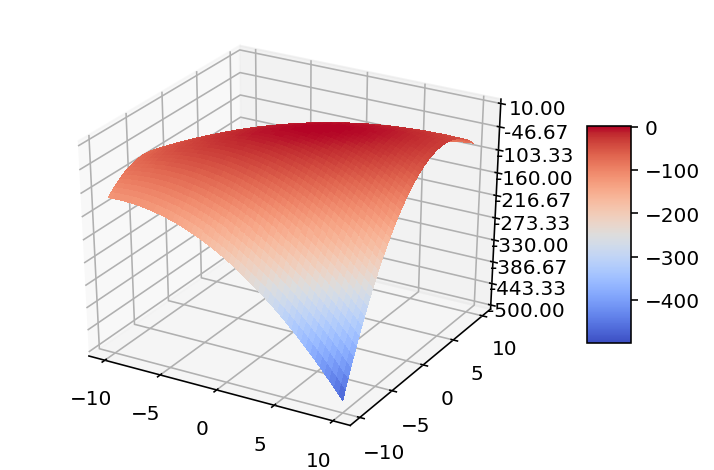

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.01)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 2*X*Y+2*X-X**2-2*Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-500, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

From the graph one can note that the max point is somewhere between 0 and 10. The top of the graph is visually flat, so it is more convenient to plot a graph with level curves projected on xy plane.

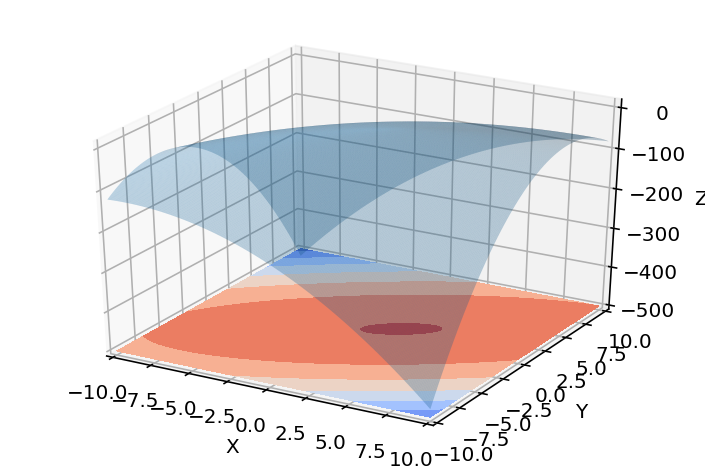

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-500, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-10, 10)
ax.set_ylabel('Y')
ax.set_ylim(-10, 10)
ax.set_zlabel('Z')
ax.set_zlim(-500, 10)

plt.show()


By the use of level curves, we know that the maximum value of the function is somewhere with 0<x<5 and 0<y<5, as in this range the highest values of z are spotted.

To find the maximum value of f(x,y) the random_search of two steps will be used. It performs n iterations m times and returns m values of max.


In [5]:
def rn_srch(x_low, x_upp, y_low, y_upp, f, m, n):
    max_vals = []
    x_vals = []
    y_vals = []
    
    for i in range (m):
        x_max = x_low
        y_max = y_low
        f_max = f(x_max,y_max)
        
        for j in range (n):
            x = (x_upp-x_low)*rn.random()+x_low
            y = (y_upp-y_low)*rn.random()+y_low
            if (f_max<f(x,y)):
                f_max = f(x,y)
                x_max = x
                y_max = y
                
        max_vals.append(f_max)
        x_vals.append(x_max)
        y_vals.append(y_max)
        
    return x_vals, y_vals, max_vals

#function that finds the max of array
def max_of_arr(arr):
    n=len(arr)
    max_val=arr[0]
    k=0
    for i in range(n):
        if max_val<arr[i]:
            k=i
            max_val=arr[i]
    return max_val, k

Let us find the maximum value of the function by the random search:

In [6]:
#overall there are 100*1000 iterations to find max
X,Y,Z=rn_srch(0, 5, 0, 5, f, 100, 1000)
MAX, i = max_of_arr(Z)
X_MAX = X[i]
Y_MAX = Y[i]
print('Experimental results of maximum ',MAX, ' with X = ',X_MAX, ' and Y = ',Y_MAX)

Experimental results of maximum  1.9998697455813739  with X =  1.9851265038915566  and Y =  0.995697257001748


Now we can write a function of finding an error with respect to the value of max that we got higher. 

In [7]:
def error(arr):
    n = len(arr)
    
    #finding sum of squared deviations
    total_sqr = 0
    for j in range (n):
        total_sqr += (MAX-arr[j])**2
        
    return np.sqrt(total_sqr/(n-1))

Let us plot the number of iterations vs error. According to theory, the dependence is $\frac{1}{N^{1/2}}$. Plotting to graphs on one plot gives us the following

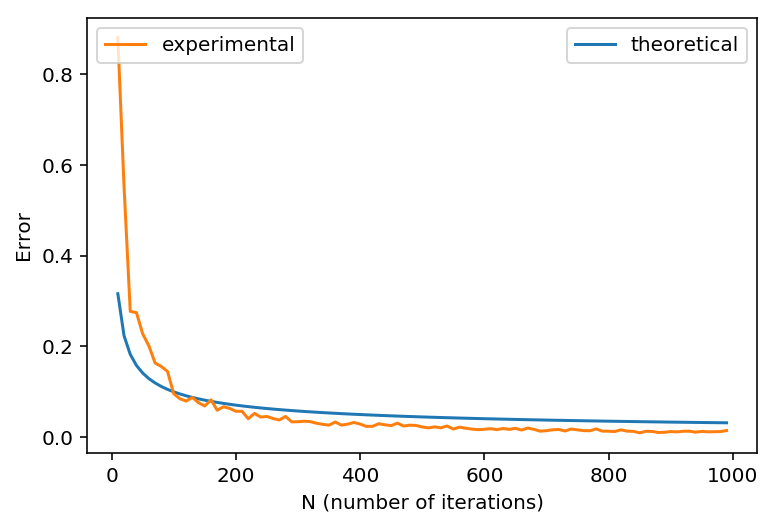

In [11]:
errors = []
n_itrs = []
#here m=100
for i in range (10,1000,10):
    X,Y,Z = rn_srch(0, 5, 0, 5, f, 100, i)
    errors.append(error(Z))
    n_itrs.append(i)
    
#theoretical dependence
x = list(range(10, 1000, 10))
y = [np.sqrt(1/i) for i in x]

#plotting
thr, = plt.plot(x,y, label='theoretical')
exp, = plt.plot(n_itrs, errors, label='experimental')
plt.xlabel("N (number of iterations)")
plt.ylabel("Error")

# Create a legend for the theoretical line.
first_legend = plt.legend(handles=[thr], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[exp], loc=2)

Here the graphs do not match as the final formula will be changed by some parameters a,b , such that 
$$Error=\frac{a}{(bN)^{0.5}}$$, 
but we already see that the dependence takes this form as the graphs are similar 

The same graph in log scsale:

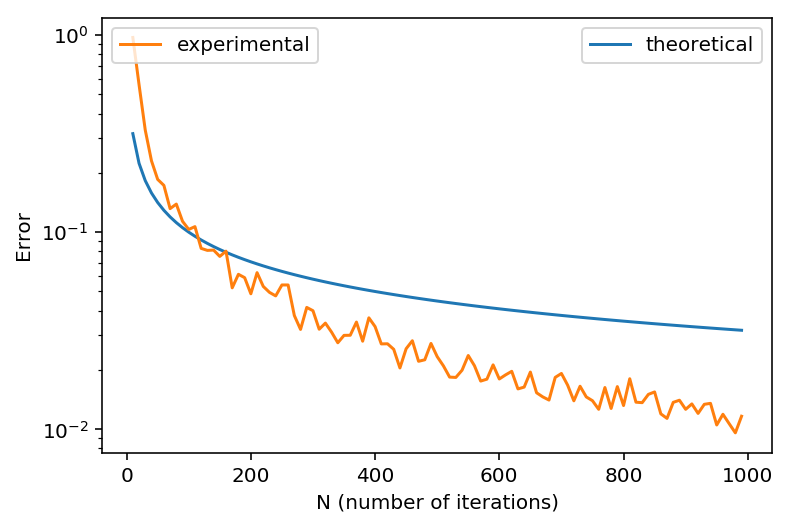

In [9]:
#plotting
thr, = plt.plot(x,y, label='theoretical')
exp, = plt.plot(n_itrs, errors, label='experimental')
plt.xlabel("N (number of iterations)")
plt.ylabel("Error")
plt.yscale('log')

# Create a legend for the theoretical line.
first_legend = plt.legend(handles=[thr], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the experimental line.
plt.legend(handles=[exp], loc=2)

Overall, as the number of iterations increases, the difference between the experimental value and the maximum value decreases. Although, it gives relatively precise results, random search takes a lot of memory units to perform. For  the efficiency it is better to use Gradient Descent or Adam Optimizer.
Also, one can deduce that the real maximum value of the function is f(x,y)=2 with x=2 and y=1.
